Using datasets from Kaggle. 
Trying to improve upon the idea of simply filtering for gender based words.
Looking for other datasets?



In [1]:
pip install unidecode

     |████████████████████████████████| 241 kB 36.8 MB/s 


In [2]:
pip install --upgrade gensim

     |████████████████████████████████| 23.9 MB 97 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [29]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
# nltk.download('punkt')
import pandas as pd
# import json
import numpy as np
import string
import unidecode
import re

In [4]:
import nltk as nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import gensim.downloader

print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [6]:
# Masculine-coded words
masc_word=["active",
"adventurous",
"aggress",
"ambitio",
"analy",
"assert",
"athlet",
"autonom",
"battle",
"boast",
"challeng",
"champion",
"compet",
"confident",
"courag",
"decid",
"decision",
"decisive",
"defend",
"determin",
"domina",
"dominant",
"driven",
"fearless",
"fight",
"force",
"greedy",
"head-strong",
"headstrong",
"hierarch",
"hostil",
"impulsive",
"independen",
"individual",
"intellect",
"lead",
"logic",
"objective",
"opinion",
"outspoken",
"persist",
"principle",
"reckless",
"self-confiden",
"self-relian",
"self-sufficien",
"selfconfiden",
"selfrelian",
"selfsufficien",
"stubborn",
"superior",
"unreasonab"]

In [7]:
# Feminine,coded words
fem_word=["agree",
"affectionate",
"child",
"cheer",
"collab",
"commit",
"communal",
"compassion",
"connect",
"considerate",
"cooperat",
"co-operat",
"depend",
"emotiona",
"empath",
"feel",
"flatterable",
"gentle",
"honest",
"interpersonal",
"interdependen",
"interpersona",
"inter-personal",
"inter-dependen",
"inter-persona",
"kind",
"kinship",
"loyal",
"modesty",
"nag",
"nurtur",
"pleasant",
"polite",
"quiet",
"respon",
"sensitiv",
"submissive",
"support",
"sympath",
"tender",
"together",
"trust",
"understand",
"warm",
"whin",
"enthusias",
"inclusive",
"yield",
"share",
"sharin"]

In [8]:
df1= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/monster_com-job_sample.csv")

In [9]:
df1["job_description"]

0        TeamSoft is seeing an IT Support Specialist to...
1        The Wisconsin State Journal is seeking a flexi...
2        Report this job About the Job DePuy Synthes Co...
3        Why Join Altec? If you’re considering a career...
4        Position ID#  76162 # Positions  1 State  CT C...
                               ...                        
21995    This is a major premier Cincinnati based finan...
21996    Luxury homebuilder in Cincinnati seeking multi...
21997    RE: Adobe AEM-          Client -          Loca...
21998    Jernberg Industries was established in 1937 an...
21999    Contract AdministratorCan you be the point per...
Name: job_description, Length: 22000, dtype: object

In [10]:
def clean (text):
    
    text_urless=re.sub(r"(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*", '', text)
    
    for punctuation in string.punctuation:
        text = text_urless.replace(punctuation, ' ') # Remove Punctuation
        
    lowercased = text.lower() # Lower Case
    
    unaccented_string = unidecode.unidecode(lowercased) # remove accents
          
    tokenized = word_tokenize(unaccented_string) # Tokenize
    
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    
    stop_words = set(stopwords.words('english')) # Make stopword list
    
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    
    return " ".join(without_stopwords)

# df['clean_tweet'] = df['tweet'].apply(clean)

# df.head()

In [11]:
df1["clean_description"]=df1["job_description"].apply(clean)

In [12]:
def masc_woman(description):
    count_masc=len([x for x in masc_word if x in description])
    count_wom=len([x for x in fem_word if x in description])
    return count_masc-count_wom

In [13]:
df1["biased"]=df1["clean_description"].apply(masc_woman)


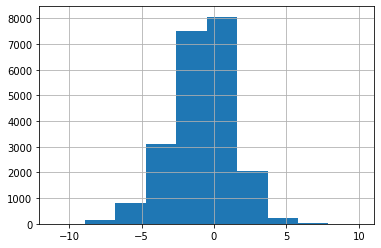

In [14]:
df1["biased"].hist()

In [58]:
df1["biased"].value_counts()

 0     5046
-1     4458
-2     3062
 1     3018
-3     1795
 2     1488
-4     1326
 3      577
-5      555
-6      266
 4      185
-7       72
-8       65
 5       50
 6       23
-9        8
-11       3
 7        2
 10       1
Name: biased, dtype: int64

In [59]:
df1[["biased"]].describe()

,biased
count,22000.000000
mean,-0.813364
std,2.034652
min,-11.000000
25%,-2.000000
50%,-1.000000
75%,0.000000
max,10.000000


In [15]:
model_news = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [20]:
df1.columns

Index(['country', 'country_code', 'date_added', 'has_expired', 'job_board',
       'job_description', 'job_title', 'job_type', 'location', 'organization',
       'page_url', 'salary', 'sector', 'uniq_id', 'clean_description',
       'biased'],
      dtype='object')

In [21]:
df1.job_title

0                     IT Support Technician Job in Madison
1                  Business Reporter/Editor Job in Madison
2        Johnson & Johnson Family of Companies Job Appl...
3                          Engineer - Quality Job in Dixon
4             Shift Supervisor - Part-Time Job in Camphill
                               ...                        
21995    Assistant Vice President - Controller Job in C...
21996                         Accountant Job in Cincinnati
21997                      AEM/CQ developer Job in Chicago
21998    Electrician - Experienced Forging Electrician ...
21999             Contract Administrator Job in Cincinnati
Name: job_title, Length: 22000, dtype: object

In [16]:
model_news.most_similar("specialist")

[('specialists', 0.6954889297485352),
 ('expert', 0.6338785886764526),
 ('consultant', 0.5788604617118835),
 ('Specialist', 0.5491595268249512),
 ('specializing', 0.5305806398391724),
 ('technician', 0.5135164260864258),
 ('specialized', 0.4869503974914551),
 ('specializes', 0.4825648069381714),
 ('coordinator', 0.4796016216278076),
 ('adjunct_associate_professor', 0.4698087275028229)]

In [ ]:
# pd.read_json             ("/content/drive/MyDrive/Colab Notebooks/data/professions.json")
json.load("/content/drive/MyDrive/Colab Notebooks/data/professions.json")

In [45]:
professions_df=pd.read_json("/content/drive/MyDrive/Colab Notebooks/data/professions.json")
professions_df.rename(columns={0:"job_title", 1:"woman_biased", 2:"man_biased"}, inplace=True)


In [ ]:
[x for x in professions_df.job_title] # if x in df1.job_title]

In [ ]:
set([x for x in df1.job_title])

In [75]:
df1[["clean_description", "biased"]].sort_values("biased")

,clean_description,biased
19939,summaryassign stations side work servers commu...,-11
19021,summarylocation temple university new starbuck...,-11
19178,summaryassign stations side work cooks cashier...,-11
8728,location id posted date category employment ty...,-9
16667,location id posted date category employment ty...,-9
...,...,...
1665,report job job leading manufacturer rubber coa...,6
4311,america us nyse tmus redefining way consumers ...,6
21672,description northrop grumman cincinnati oh loo...,7
21845,description northrop grumman cincinnati oh loo...,7


In [80]:
df1[["clean_description", "biased"]].sort_values("biased")["clean_description"][19021]

'summarylocation temple university new starbucks med school opening april job classification full time openings pay rate shift one mon shift two mon shift three mon responsibilitiesoversee various areas food service activities monitor quality food products adequate quantities service excellent customer service skills coach employees meeting job ensuring safe working environment throughout facility monitoring employee productivity provides suggestions increased service oversee operation absence store manager ensure needs customer client employees metorients trains employees works customers ensure satisfaction areas quality service problem years cash handling experience including register systems years working starbucks dunkin donuts coffee shop starbuck experience preferred years experience completing inventory ordering previous supervisory experience food service skill motivation food service personnelproven ability meet goals along understanding food service financesgeneral knowledge 

In [17]:
model_news.similar_by_vector    (model_news["king"]-model_news["man"] +model_news["specialist"])  

[('specialist', 0.6409542560577393),
 ('king', 0.590969979763031),
 ('specialists', 0.43920382857322693),
 ('expert', 0.4227278530597687),
 ('queen', 0.40973883867263794),
 ('kings', 0.3976721167564392),
 ('tsar', 0.36690059304237366),
 ('consultant', 0.36134448647499084),
 ('undisputed_king', 0.3554269075393677),
 ('monarch', 0.34611785411834717)]

In [60]:
model_news.similar_by_vector    (model_news["queen"]-model_news["king"] -model_news["specialist"])   #

[('floral_frock', 0.3174666166305542),
 ('RuPaul_Drag_Race', 0.3082559406757355),
 ('Pantsuits', 0.302278995513916),
 ('Shenae_Grimes', 0.3009686768054962),
 ('pageant', 0.3003758192062378),
 ('Nicole_Richies', 0.30025190114974976),
 ('Queen_Pageant', 0.29840007424354553),
 ('Blige', 0.2939970791339874),
 ('Pageant', 0.29372668266296387),
 ('Gossip_Girl', 0.29129791259765625)]

In [65]:
model_news.similar_by_vector    (model_news["woman"]-model_news["man"] -model_news["strengths"]) 

[('Steven_Passalaqua', 0.28545618057250977),
 ('Jill_Coccaro', 0.2825280725955963),
 ('HADDAM_Conn.', 0.2790330946445465),
 ('Claudia_Aderotimi', 0.27546632289886475),
 ('Saeeda_Khan', 0.27512186765670776),
 ('RPC_INCORPORATED_AND_SUBSIDIARIES', 0.27254772186279297),
 ('Minouche_Noel', 0.27246490120887756),
 ('Aol_Weird_News', 0.27211377024650574),
 ('SCHEDULED_TO_PREMIERE_4Q', 0.27126345038414),
 ('Yorkshire_terrier_puppy', 0.27106356620788574)]

In [71]:
model_news.similar_by_vector    (model_news["she"]+model_news["he"] -model_news["specialist"]) 

[('she', 0.7309489250183105),
 ('he', 0.6838458776473999),
 ('She', 0.5508639216423035),
 ('her', 0.5299752354621887),
 ('hers', 0.4767470955848694),
 ('herself', 0.4746932089328766),
 ("hadn'tI", 0.46073880791664124),
 ('He', 0.45339342951774597),
 ('him', 0.4450664520263672),
 ('I', 0.4437461197376251)]

In [60]:
test1=["he", "man", "king", "adventurous"]
test2=["she", "woman", "queen", "ballerina"]

In [61]:
model_news.n_similarity(test1, test2)

0.50201976

In [18]:
v=model_news["he"]-model_news["she"]
model_news.similar_by_vector (v/np.linalg.norm(v))

[('Elliot_Vallejo', 0.33720386028289795),
 ('TRENDING_UP', 0.33610448241233826),
 ('Bob_Skoronski', 0.33573102951049805),
 ('Eddie_Taubensee', 0.32079705595970154),
 ('Braylon_Edwards_Kellen_Winslow', 0.31876763701438904),
 ('Offseason_acquisition', 0.31653696298599243),
 ('Fans_cheered_loudly', 0.3128668963909149),
 ('Jon_Oosterhuis', 0.31080716848373413),
 ('Robby_Alomar', 0.30986636877059937),
 ('Mo_Sissoko', 0.3082132637500763)]

In [52]:
model_news.words_closer_than    (model_news["queen"]+model_news["king"] +model_news["documentation"])   #

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `words_closer_than` (Use closer_than instead).
  """Entry point for launching an IPython kernel.


TypeError: ignored

In [ ]:
model_news.n_similarity ("man", "specialist")

In [ ]:
model_news["she"]-model_news["specialist"]>model_news["he"]          #.wv['queen']

In [15]:
word2vec = Word2Vec(sentences=X_train[:10000], vector_size=30, window=2, min_count=10)

'teamsoft seeing support specialist join client madison wi ideal candidate must least years experience field need familiar variety field concepts practices procedures position relies extensive experience judgment plan accomplish goals required skills call tracking phone based technical problem documentation remote desktop management respond customer general understanding microsoft office suitefind teamsoft madison area technology leader consultants owned operated managed consultants teamsoft clear choice career join teamsoft family today know teamsoft offers salaried options many positions include weeks pto great benefits teamsoft business since teamsoft owners local professionals possess wealth experience application development business analysis project teamsoft recruiters knowledgeable friendly ready help make next great career teamsoft offers full benefits suite consultants including plan vested dollar dollar targeted selection process designed get know strengths career interests p

In [81]:
words = sorted([w for w in model_news.key_to_index], key=lambda w: model_news.key_to_index[w])

In [ ]:
words

In [ ]:
model_news.key_to_index

['active', 'analy', 'lead']

In [85]:
from bs4 import BeautifulSoup
from bs4.element import Comment
import urllib.request
import requests

def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True


def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

# html = urllib.request.urlopen('https://seraphin.be/fr/emplois/front-end-developer').read()
url='https://seraphin.be/fr/emplois/front-end-developer'
response= requests.get(url)
# result=response.json()
# print(text_from_html(html))
response

<Response [200]>

In [88]:
url='https://seraphin.be/fr/emplois/front-end-developer'
response= requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
texts=soup.findAll(text=True)
visible_texts = filter(tag_visible, texts) 
test_ad=" ".join(t.strip() for t in visible_texts)

In [89]:
masc_woman(test_ad)

1

In [105]:
df1[["job_title", "biased"]][df1.job_title.str.contains("Data")==True].sort_values("biased")


,job_title,biased
18884,HEDIS Data Coordinator Job in Chicago,-6
19593,Grill Cook -NYLIC-Data Center Job in Lebanon,-6
21683,Lead Database Administrator Job in Cincinnati,-5
724,Senior Database Administrator Job in Dallas,-5
16540,DB Database Admin Job in Columbus,-5
...,...,...
16344,Data Analyst Job in Dallas,3
1310,Infrastructure Support Architect with Datacent...,3
20810,Data Entry Clerk Job in North Palm Beach,4
8430,DC - Part-Time Data Collector - (MN,5


In [101]:
df1.job_title

0                     IT Support Technician Job in Madison
1                  Business Reporter/Editor Job in Madison
2        Johnson & Johnson Family of Companies Job Appl...
3                          Engineer - Quality Job in Dixon
4             Shift Supervisor - Part-Time Job in Camphill
                               ...                        
21995    Assistant Vice President - Controller Job in C...
21996                         Accountant Job in Cincinnati
21997                      AEM/CQ developer Job in Chicago
21998    Electrician - Experienced Forging Electrician ...
21999             Contract Administrator Job in Cincinnati
Name: job_title, Length: 22000, dtype: object